In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
customer= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 1 - Retail Case Study/Customer.csv")
transaction= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 1 - Retail Case Study/Transactions.csv")
product= pd.read_csv("/Users/z001bln/Desktop/StudyMaterial/AnalytixLab/Assignments/Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv")


In [4]:
display(customer.shape)
display(transaction.shape)
display(product.shape)


(5647, 4)

(23053, 10)

(23, 4)

In [5]:
display(customer.head(2))
display(transaction.head(2))
display(product.head(2))


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28/02/14,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27/02/14,5,3,-5,-1497,785.925,-8270.925,e-Shop


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


# Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [6]:
# join the first two tables
cust_trns= pd.merge(left= customer, right= transaction, how = 'inner', left_on='customer_Id', right_on='cust_id')
cust_trns

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13/01/14,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16/12/13,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,28810141075,268408,02/09/13,10,6,2,813,170.730,1796.730,TeleShop
3,268408,02-01-1970,M,4.0,64633435931,268408,06/05/13,4,2,3,312,98.280,1034.280,Flagship store
4,268408,02-01-1970,M,4.0,56902862040,268408,30/01/13,9,3,5,868,455.700,4795.700,e-Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18/10/11,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,07/07/11,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22/10/12,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,05/09/12,1,2,4,876,367.920,3871.920,e-Shop


In [7]:
# drop the duplicate columns
cust_trns= cust_trns.drop(columns= 'cust_id')

In [8]:
cust_trns.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13/01/14,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16/12/13,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,28810141075,02/09/13,10,6,2,813,170.730,1796.730,TeleShop
3,268408,02-01-1970,M,4.0,64633435931,06/05/13,4,2,3,312,98.280,1034.280,Flagship store
4,268408,02-01-1970,M,4.0,56902862040,30/01/13,9,3,5,868,455.700,4795.700,e-Shop


In [9]:
#join the merged table with 3rd table
customer_final = pd.merge(left=cust_trns, right = product, left_on= ['prod_subcat_code','prod_cat_code'], right_on= ['prod_sub_cat_code','prod_cat_code'] , how = 'inner')
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13/01/14,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25/03/11,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23/05/11,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,09/12/13,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23/05/13,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [10]:
customer_final= customer_final.drop(columns= 'prod_sub_cat_code')
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13/01/14,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25/03/11,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23/05/11,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,09/12/13,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23/05/13,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


# 2. Prepare a summary report for the merged data set.


In [11]:
# a. Get the column names and their corresponding data types
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
customer_Id         23053 non-null int64
DOB                 23053 non-null object
Gender              23044 non-null object
city_code           23045 non-null float64
transaction_id      23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [12]:
# b. Top/Bottom 10 observations
display("Top 10 records: ",customer_final.head(10))
display("Bottom 10 records: ",customer_final.tail(10))

'Top 10 records: '

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13/01/14,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25/03/11,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23/05/11,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,09/12/13,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23/05/13,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.0,78357345891,11/04/12,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.0,23916816961,09/02/13,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.0,35560569829,09/03/13,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.0,94033312891,26/04/12,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,11/01/12,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


'Bottom 10 records: '

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/06/11,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24/12/13,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19/11/12,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22/07/12,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16/07/12,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/12,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17/08/13,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,01/02/12,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31/01/11,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26/01/11,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


In [13]:
#Treat missing and null values:
customer_final.count()

customer_Id         23053
DOB                 23053
Gender              23044
city_code           23045
transaction_id      23053
tran_date           23053
prod_subcat_code    23053
prod_cat_code       23053
Qty                 23053
Rate                23053
Tax                 23053
total_amt           23053
Store_type          23053
prod_cat            23053
prod_subcat         23053
dtype: int64

In [14]:
customer_final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [15]:
customer_final.columns
cont_vars= ['customer_Id','city_code','transaction_id','prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax',
       'total_amt']

In [16]:
customer_final_cont= customer_final.loc[:,cont_vars]
customer_final_cont

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,268408,4.0,87243835584,7,5,5,187,98.175,1033.175
1,275152,4.0,73109425404,7,5,2,464,97.440,1025.440
2,275034,4.0,64777271023,7,5,2,197,41.370,435.370
3,270829,8.0,87174343938,7,5,4,1141,479.220,5043.220
4,267657,7.0,76242744953,7,5,4,1020,428.400,4508.400
...,...,...,...,...,...,...,...,...,...
23048,267812,1.0,63540378797,10,5,3,224,70.560,742.560
23049,274618,7.0,71793203305,10,5,4,691,290.220,3054.220
23050,268097,7.0,91217108818,10,5,2,411,86.310,908.310
23051,268097,7.0,90114483354,10,5,-4,-1408,591.360,-6223.360


In [17]:
def remove_missings_num(x):
    return x.fillna(x.median())

customer_final_cont_vars= customer_final_cont.apply(remove_missings_num)

In [18]:
customer_final_cont_vars.isnull().sum()

customer_Id         0
city_code           0
transaction_id      0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
dtype: int64

In [19]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
# customer_final_cont_vars.describe()
def five_num_summary(x):
    q = x.quantile([0,0.25,0.50,0.75,1])
    q.index = ["min", "Q1", "median", "Q3", "max"]  
    return q

five_num_summary(customer_final_cont_vars)

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
min,266783.0,1.0,3.268991e+06,1.0,1.0,-5.0,-1499.0,7.350,-8270.925
Q1,268935.0,3.0,2.493864e+10,3.0,2.0,1.0,312.0,98.280,762.450
median,270980.0,5.0,5.009313e+10,5.0,4.0,3.0,710.0,199.080,1754.740
Q3,273114.0,8.0,7.533000e+10,10.0,5.0,4.0,1109.0,365.715,3569.150
max,275265.0,10.0,9.998755e+10,12.0,6.0,5.0,1500.0,787.500,8287.500


In [20]:
# d. Frequency tables for all the categorical variables
cat_vars= list(customer_final.columns.difference(cont_vars))
customer_cat_vars= customer_final[cat_vars]
customer_cat_vars

,DOB,Gender,Store_type,prod_cat,prod_subcat,tran_date
0,02-01-1970,M,TeleShop,Books,Fiction,13/01/14
1,16-01-1970,M,e-Shop,Books,Fiction,25/03/11
2,18-01-1970,F,Flagship store,Books,Fiction,23/05/11
3,22-01-1970,F,e-Shop,Books,Fiction,09/12/13
4,29-01-1970,F,e-Shop,Books,Fiction,23/05/13
...,...,...,...,...,...,...
23048,04-12-1992,F,TeleShop,Books,Non-Fiction,10/10/12
23049,09-12-1992,F,Flagship store,Books,Non-Fiction,17/08/13
23050,15-12-1992,F,e-Shop,Books,Non-Fiction,01/02/12
23051,15-12-1992,F,e-Shop,Books,Non-Fiction,31/01/11


In [21]:
customer_final_cat_vars=customer_cat_vars.drop(columns=['DOB','tran_date'])
customer_final_cat_vars

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction
2,F,Flagship store,Books,Fiction
3,F,e-Shop,Books,Fiction
4,F,e-Shop,Books,Fiction
...,...,...,...,...
23048,F,TeleShop,Books,Non-Fiction
23049,F,Flagship store,Books,Non-Fiction
23050,F,e-Shop,Books,Non-Fiction
23051,F,e-Shop,Books,Non-Fiction


In [22]:
def frequency_table(x):
    n = len(x)
    pct_miss = round((n - x.count())/n * 100,2)
#     mode_x = x.value_counts().index[0]
#     top_3 = list(x.value_counts().index[:3])
#     top_3 = [str(x) for x in top_3]
#     top_3_str = ", ".join(top_3)
    
#     return pd.Series([n,pct_miss,mode_x,top_3_str], index = ["length","pct_missing","mode","top_3"])
    return pd.Series([n,pct_miss],index = ["length","pct_missing"])

In [23]:
customer_final_cat_vars.apply(frequency_table)
#display(customer_final_cat_vars.info())

,Gender,Store_type,prod_cat,prod_subcat
length,23053.00,23053.0,23053.0,23053.0
pct_missing,0.04,0.0,0.0,0.0


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

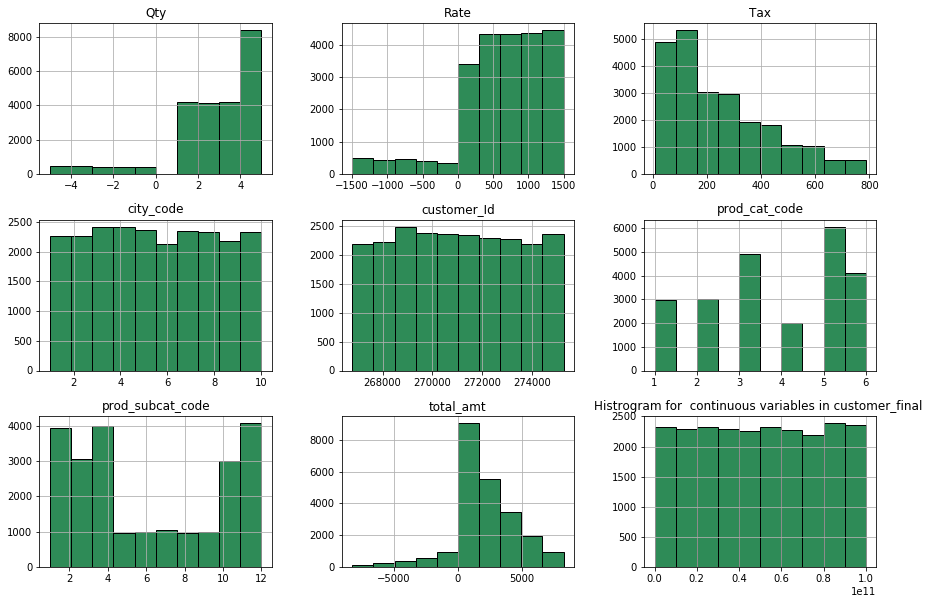

In [24]:
#histograms for all continuous variables
customer_final_cont_vars.hist(bins= 10, figsize=(15,10), edgecolor= 'black', color= 'seagreen')
plt.title("Histrogram for  continuous variables in customer_final ")
plt.show()

In [25]:
# frequency bars for categorical variables.
#customer_final_cat_vars.Store_type.unique()
#customer_final_cat_vars.prod_subcat.unique()
cat_data_num= { "Gender": {"M":1, "F":2},
              "Store_type":{"TeleShop":1,"e-Shop":2,"Flagship store":3,"MBR":4 },
              "prod_cat":{"Books":1, "Bags":2, "Home and kitchen":3, "Footwear":4, "Electronics":5,"Clothing":6},
              "prod_subcat":{"Fiction":1, "Mens":2, "Kitchen":3, "Kids":4, "Cameras":5, "Audio and video":6,"Women":7, "Mobiles":8, "Children":9, "Bath":10, "Personal Appliances":11,
                           "Academic":12, "Furnishing":13, "DIY":14, "Comics":15, "Tools":16, "Computers":17,
                               "Non-Fiction":18}}

In [26]:
customer_final_cat_vars.replace(cat_data_num, inplace=True)
customer_final_cat_vars.head()

,Gender,Store_type,prod_cat,prod_subcat
0,1.0,1,1,1
1,1.0,2,1,1
2,2.0,3,1,1
3,2.0,2,1,1
4,2.0,2,1,1


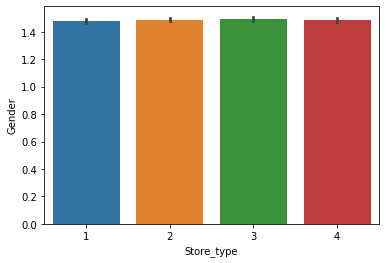

In [32]:
sns.barplot(y=customer_final_cat_vars.Gender, x=customer_final_cat_vars.Store_type)
plt.show()

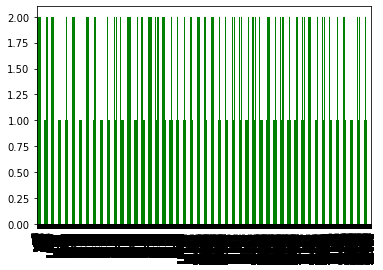

In [32]:
# customer_final_cat_vars.Gender.plot(kind= "bar", color= 'green')
# # plt.hist(customer_final_cat_vars.Store_type,edgecolor="black")
# plt.show()


<Figure size 360x2160 with 0 Axes>

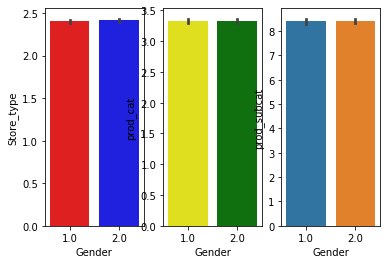

In [51]:
plt.figure(figsize=(5,30))
fig, axes = plt.subplots(1, 3)
sns.barplot(x="Gender", y="Store_type", data=customer_final_cat_vars, ax=axes[0],palette=['red','blue'])
sns.barplot(x="Gender", y="prod_cat", data=customer_final_cat_vars, ax=axes[1],palette=['yellow','green'])
sns.barplot(x="Gender", y="prod_subcat", data=customer_final_cat_vars, ax=axes[2])
plt.show()

# 4. Calculate the following information using the merged dataset :


In [ ]:
# a. Time period of the available transaction data
customer_final= customer_final.sort_values(by='tran_date' , ascending= False).reset_index(drop= True)
customer_final

In [ ]:
# convert the releavnt date objects to date time
customer_final.DOB= pd.to_datetime(customer_final.DOB)
customer_final.tran_date= pd.to_datetime(customer_final.tran_date)
customer_final.info()

# ***********  Recheck this

In [ ]:
n= customer_final.tran_date.count()
time_period= customer_final.tran_date[0]- customer_final.tran_date[n-1]
time_period


In [ ]:
# b. Count of transactions where the total amount of transaction was negative
customer_final.total_amt[customer_final.total_amt<0].count()

# 5. Analyze which product categories are more popular among females vs male customers.

In [ ]:
customer_final.groupby(by= ['prod_cat_code','Gender'])[['prod_cat_code']].count().add_prefix("count_")


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [ ]:
temp= customer_final.groupby(by= ['city_code'])[['customer_Id']].count().add_prefix("count_")
n= customer_final.customer_Id.count()
pct= round(temp/n*100,2).rename(columns= {"count_customer_Id":"%_customer"})
pd.concat([temp,pct], axis=1)

# 7. Which store type sells the maximum products by value and by quantity?

In [ ]:
store_type_by_qty= customer_final.groupby(by= ['Store_type'])[['Qty','total_amt']].sum().sort_values(by =['Qty', 'total_amt'] , ascending= False).head(1)
display("The storetype which sell the max qty and value", store_type_by_qty)


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [ ]:
res= customer_final[((customer_final.prod_cat== "Electronics") | (customer_final.prod_cat=="Clothing")) & (customer_final.Store_type == 'Flagship store' )]
res.groupby(by= 'Store_type')[['total_amt']].sum()


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [ ]:
customer_final[(customer_final.Gender== 'M') & (customer_final.prod_cat== 'Electronics')].groupby(by= 'Gender')[['total_amt']].sum()
#customer_final.groupby(by= ['Gender','prod_cat'])[['total_amt']].sum()

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [ ]:
#customer_final.shape
# pos_transactions= customer_final[customer_final.total_amt >0]

# t= pos_transactions.groupby('customer_Id')[['transaction_id']].count() > 10

#customer_final.loc[customer_final.customer_Id.duplicated(),]
customer_final.info()

# 11. For all customers aged between 25 - 35, find out:


In [ ]:
today= pd.datetime.today()
cur_date= pd.to_datetime(today)
cur_date

In [ ]:
customer_final['age'] = today - customer_final.DOB
customer_final.age= round((customer_final.age.dt.days/365.25),0)
customer_final.head()

In [ ]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

cust_age= customer_final[(customer_final.age >= 25) & (customer_final.age <= 35) & (cust_age.prod_cat == 'Electronics') | (cust_age.prod_cat == 'Books')]
cust_age.groupby(by= 'prod_cat')[['total_amt']].sum().add_prefix("spent_")


In [ ]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
customer_final[(customer_final.tran_date >= '2014-01-01') & (customer_final.tran_date <= '2014-03-01')].groupby(by= 'customer_Id')[['total_amt']].sum().add_prefix("spent_")

